In [3]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess

In [4]:

x_0 = input("x_0 ")
v_0 = input("v_0 ")
omega = input("omega ")
delta_t = input("delta_t ")
max_t = input("max_t ")
subprocess.call(["../facultative_cpp/cpp_3_week/week_3/week_3/main", x_0, v_0, omega, delta_t, max_t])
data_consts = np.fromfile("output_consts.bin")
data = np.fromfile("output.bin").reshape((-1, 4)).transpose()
data_h = np.fromfile("output_h.bin").reshape((-1, 4)).transpose()
data_rk = np.fromfile("output_rk.bin").reshape((-1, 4)).transpose()
data_rk_4 = np.fromfile("output_rk_4.bin").reshape((-1, 4)).transpose()
t = data[0]
x = data[1]
v = data[2]
E = data[3]
omega = data_consts[2]

x_0 1
v_0 0
omega 1
delta_t 0.001
max_t 1000


<IPython.core.display.Javascript object>


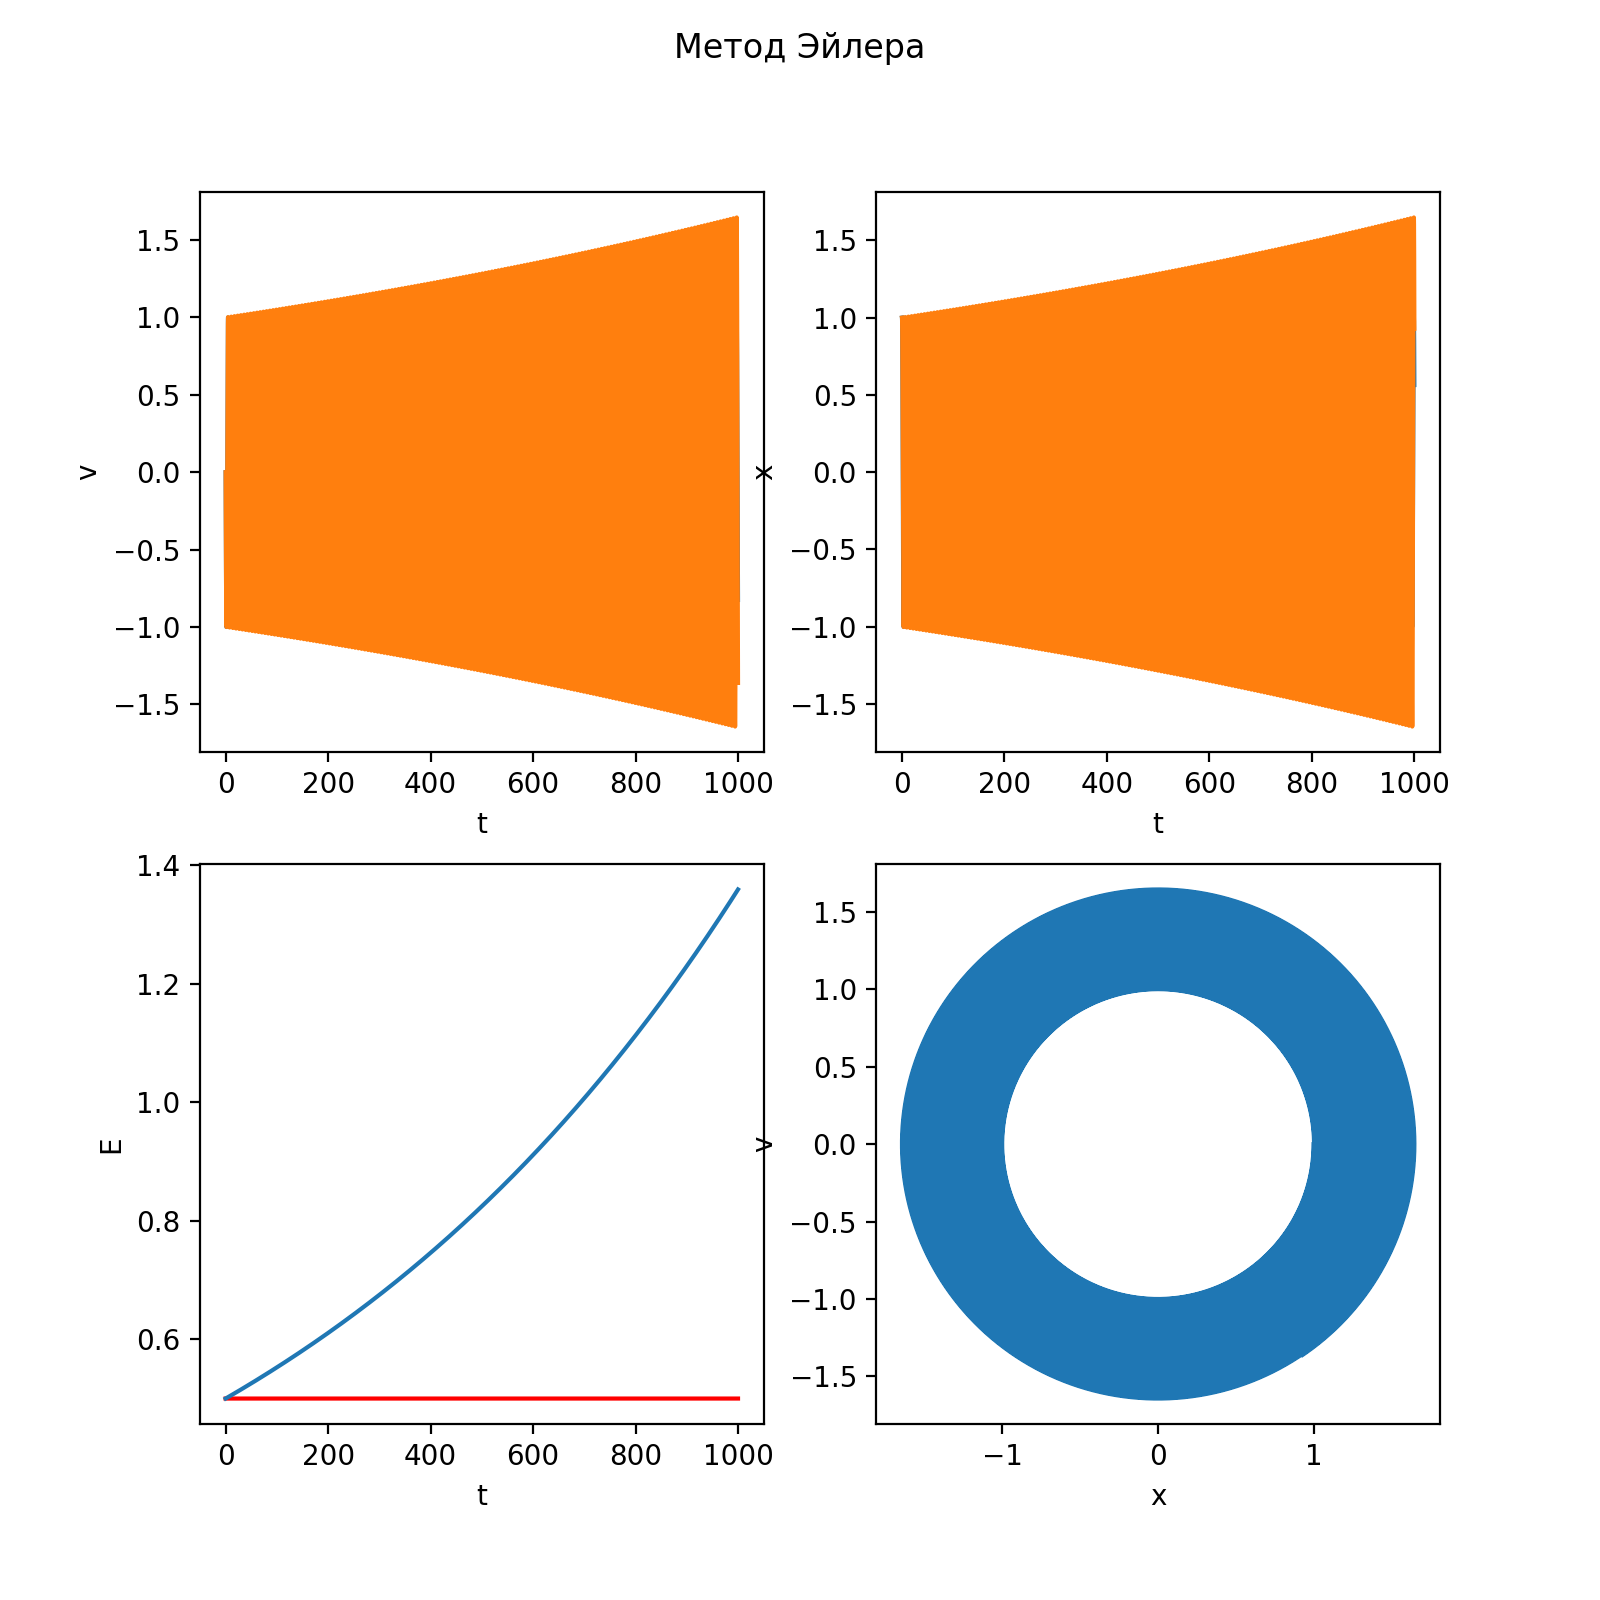

In [5]:
%matplotlib notebook

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(8,8)

fig.suptitle("Метод Эйлера")

ax[0][0].plot(t, - omega * (x[0]**2 + (v[0]/omega)**2)**0.5 * np.sin(omega * t - np.arccos(x[0]/(x[0]**2 + (v[0]/omega)**2)**0.5)))
ax[0][1].plot(t, (x[0]**2 + (v[0]/omega)**2)**0.5 * np.cos(omega * t - np.arccos(x[0]/(x[0]**2 + (v[0]/omega)**2)**0.5)))
ax[1][0].plot(t, [x[0]**2/2 * omega**2 + v[0]**2/2] * len(t), color="r")
ax[0][0].plot(t, v)
ax[0][1].plot(t, x)
ax[1][0].plot(t, E)
ax[1][1].plot(x, v)
ax[0][0].set_xlabel('t')
ax[0][0].set_ylabel('v')

ax[0][1].set_xlabel('t')
ax[0][1].set_ylabel('x')

ax[1][0].set_xlabel('t')
ax[1][0].set_ylabel('E')

ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('v')

plt.draw()

<IPython.core.display.Javascript object>


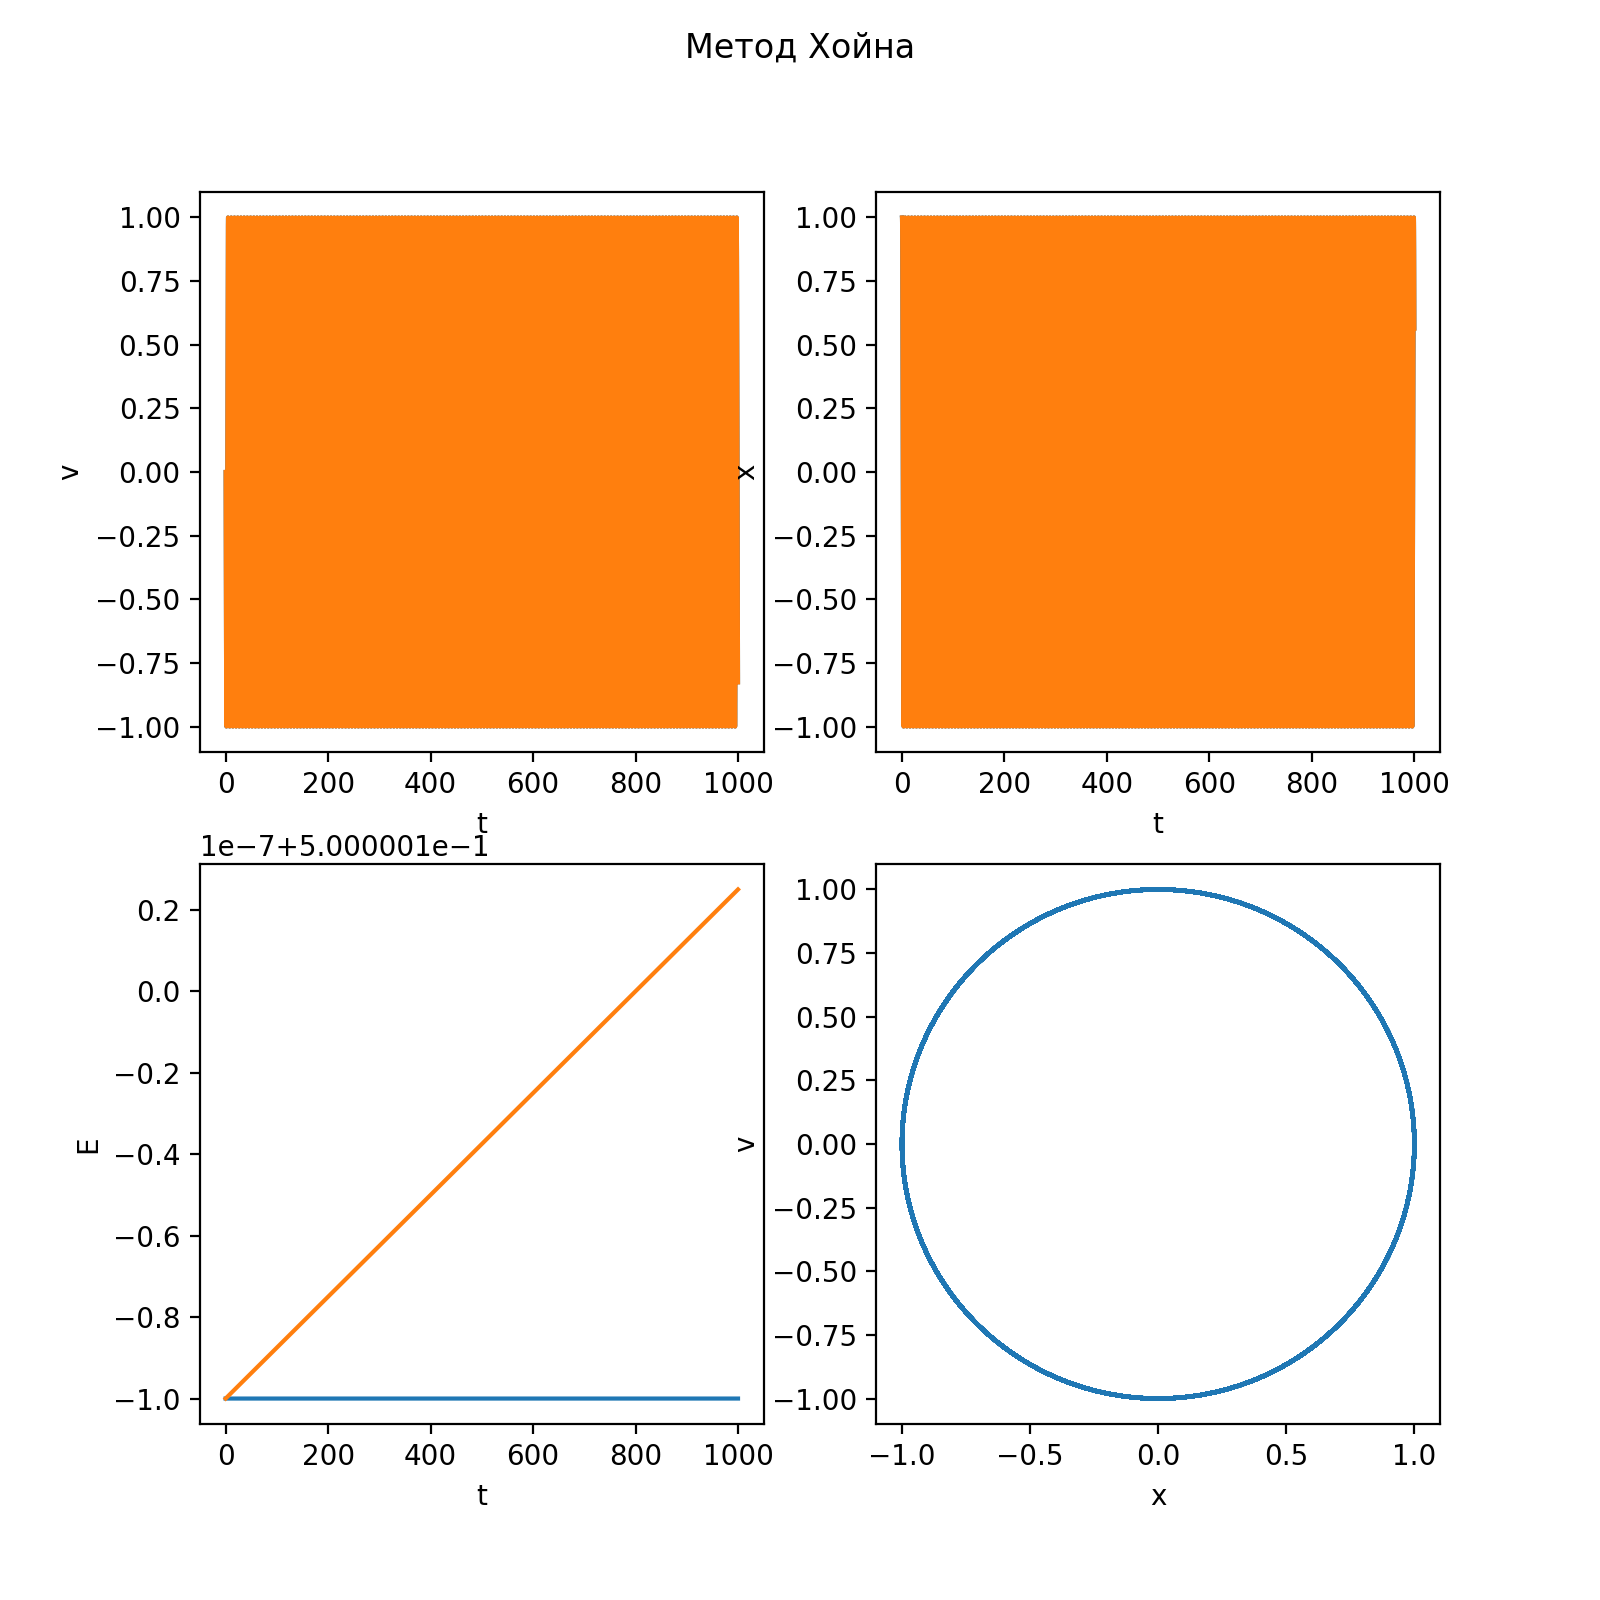

In [6]:
%matplotlib notebook

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(8,8)

fig.suptitle("Метод Хойна")

t_h = data_h[0]
x_h = data_h[1]
v_h = data_h[2]
E_h = data_h[3]

ax[0][0].plot(t_h, - omega * (x_h[0]**2 + (v_h[0]/omega)**2)**0.5 * np.sin(omega * t - np.arccos(x_h[0]/(x_h[0]**2 + (v_h[0]/omega)**2)**0.5)))
ax[0][1].plot(t_h, (x_h[0]**2 + (v_h[0]/omega)**2)**0.5 * np.cos(omega * t - np.arccos(x_h[0]/(x_h[0]**2 + (v_h[0]/omega)**2)**0.5)))
ax[1][0].plot(t_h, [x_h[0]**2/2 * omega**2 + v_h[0]**2/2] * len(t))
ax[0][0].plot(t_h, v_h)
ax[0][1].plot(t_h, x_h)
ax[1][0].plot(t_h, E_h)
ax[1][1].plot(x_h, v_h)

ax[0][0].set_xlabel('t')
ax[0][0].set_ylabel('v')

ax[0][1].set_xlabel('t')
ax[0][1].set_ylabel('x')

ax[1][0].set_xlabel('t')
ax[1][0].set_ylabel('E')

ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('v')

plt.draw()


<IPython.core.display.Javascript object>


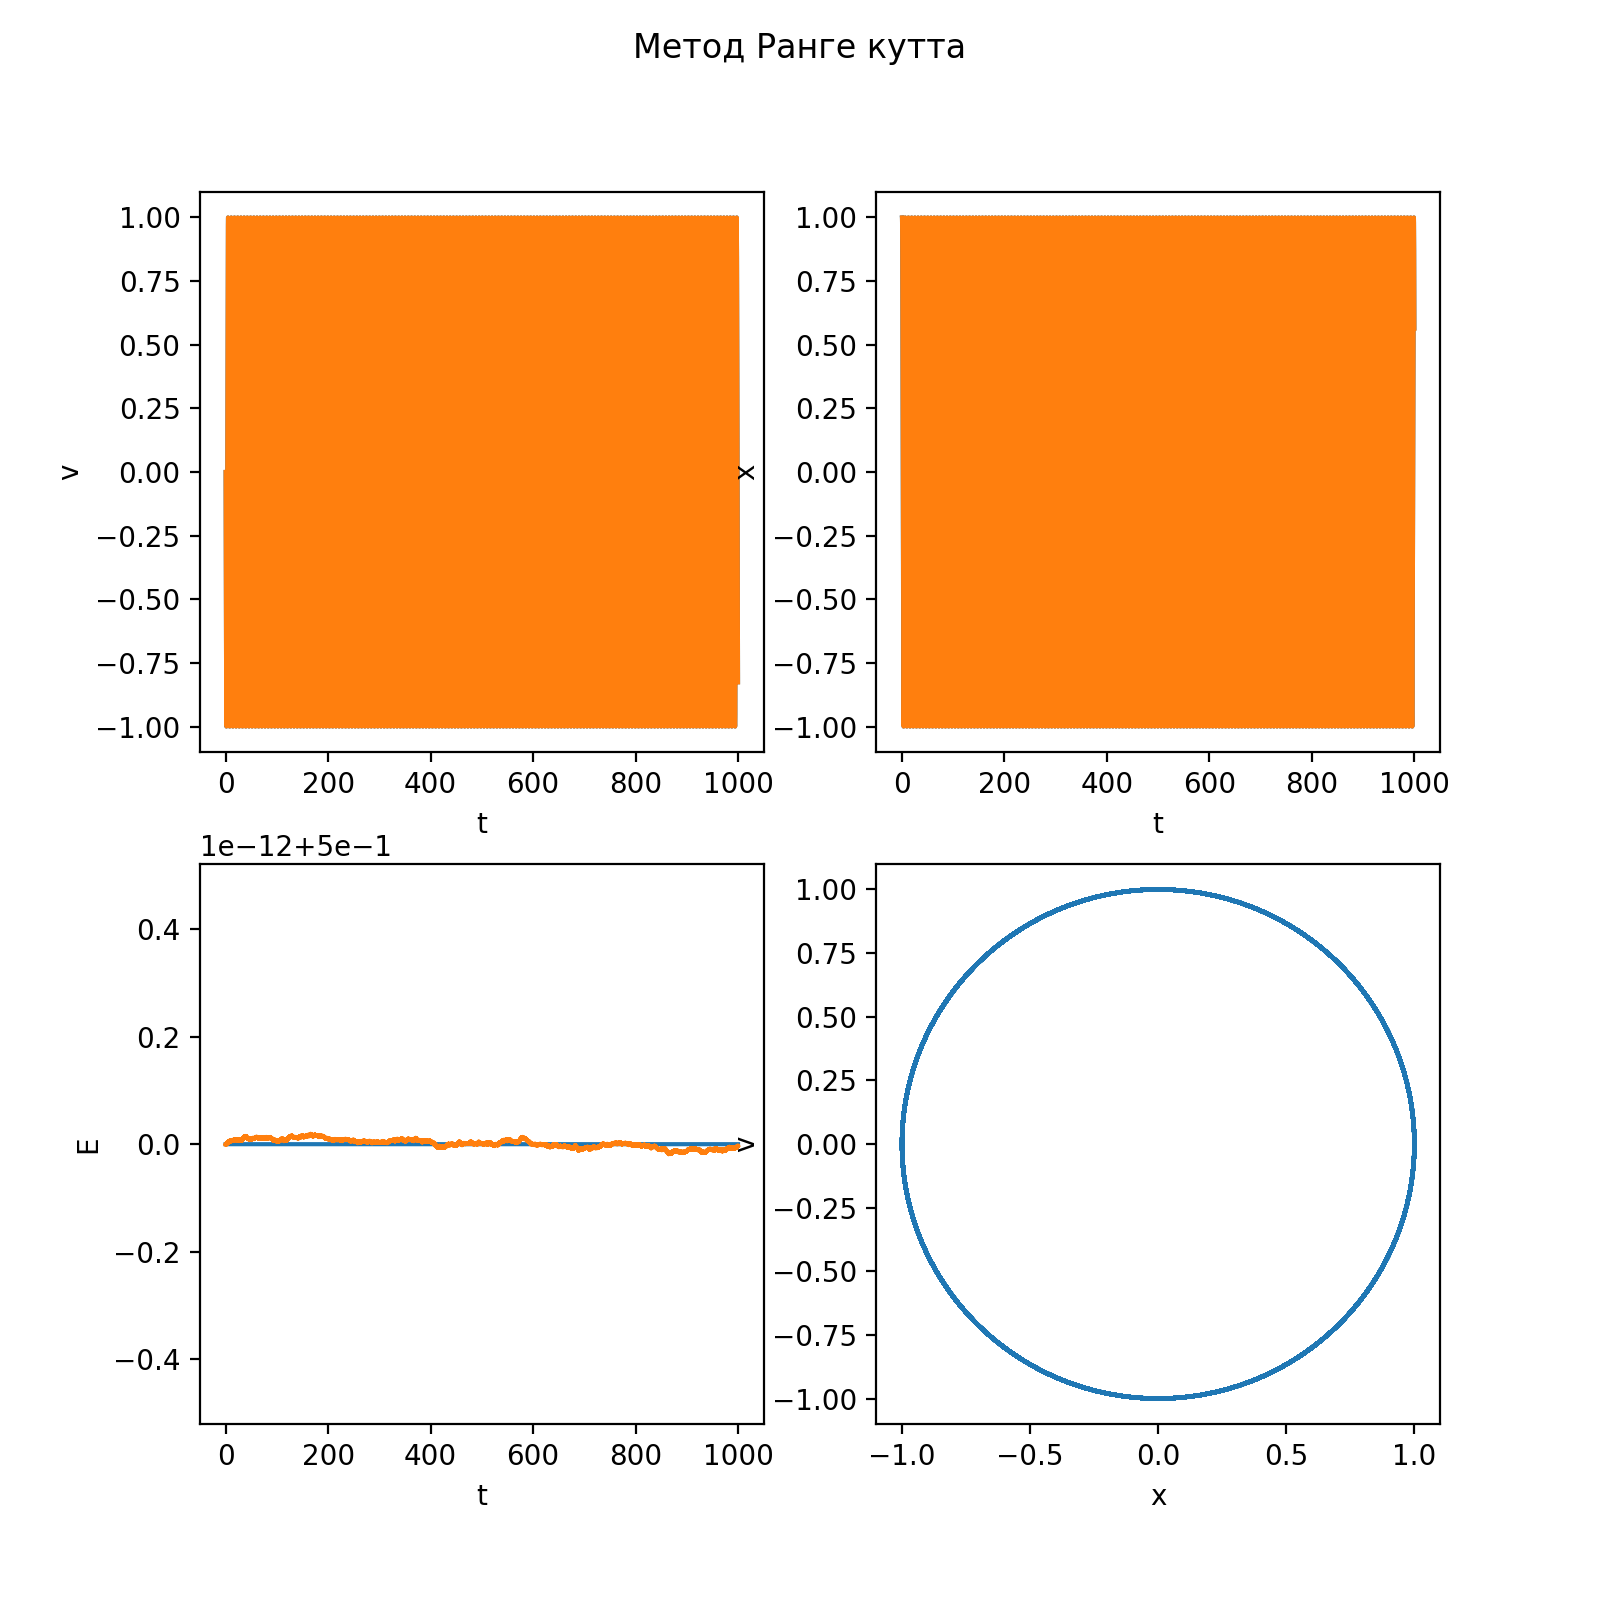

In [7]:
%matplotlib notebook

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(8,8)

fig.suptitle("Метод Ранге кутта")

t_rk = data_rk[0]
x_rk = data_rk[1]
v_rk = data_rk[2]
E_rk = data_rk[3]

t_rk_4 = data_rk_4[0]
x_rk_4 = data_rk_4[1]
v_rk_4 = data_rk_4[2]
E_rk_4 = data_rk_4[3]

ax[0][0].plot(t_rk, - omega * (x_rk[0]**2 + (v_rk[0]/omega)**2)**0.5 * np.sin(omega * t - np.arccos(x_rk[0]/(x_rk[0]**2 + (v_rk[0]/omega)**2)**0.5)))
ax[0][1].plot(t_rk, (x_rk[0]**2 + (v_rk[0]/omega)**2)**0.5 * np.cos(omega * t - np.arccos(x_rk[0]/(x_rk[0]**2 + (v_rk[0]/omega)**2)**0.5)))
ax[1][0].plot(t_rk, [x_rk[0]**2/2 * omega**2 + v_rk[0]**2/2] * len(t))
# ax[0][0].plot(t_rk, v_rk)
# ax[0][1].plot(t_rk, x_rk)
# ax[1][0].plot(t_rk, E_rk)
# ax[1][1].plot(x_rk, v_rk)

ax[0][0].plot(t_rk_4, v_rk_4)
ax[0][1].plot(t_rk_4, x_rk_4)
ax[1][0].plot(t_rk_4, E_rk_4)
ax[1][1].plot(x_rk_4, v_rk_4)

ax[0][0].set_xlabel('t')
ax[0][0].set_ylabel('v')

ax[0][1].set_xlabel('t')
ax[0][1].set_ylabel('x')

ax[1][0].set_xlabel('t')
ax[1][0].set_ylabel('E')

ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('v')

plt.draw()

<IPython.core.display.Javascript object>


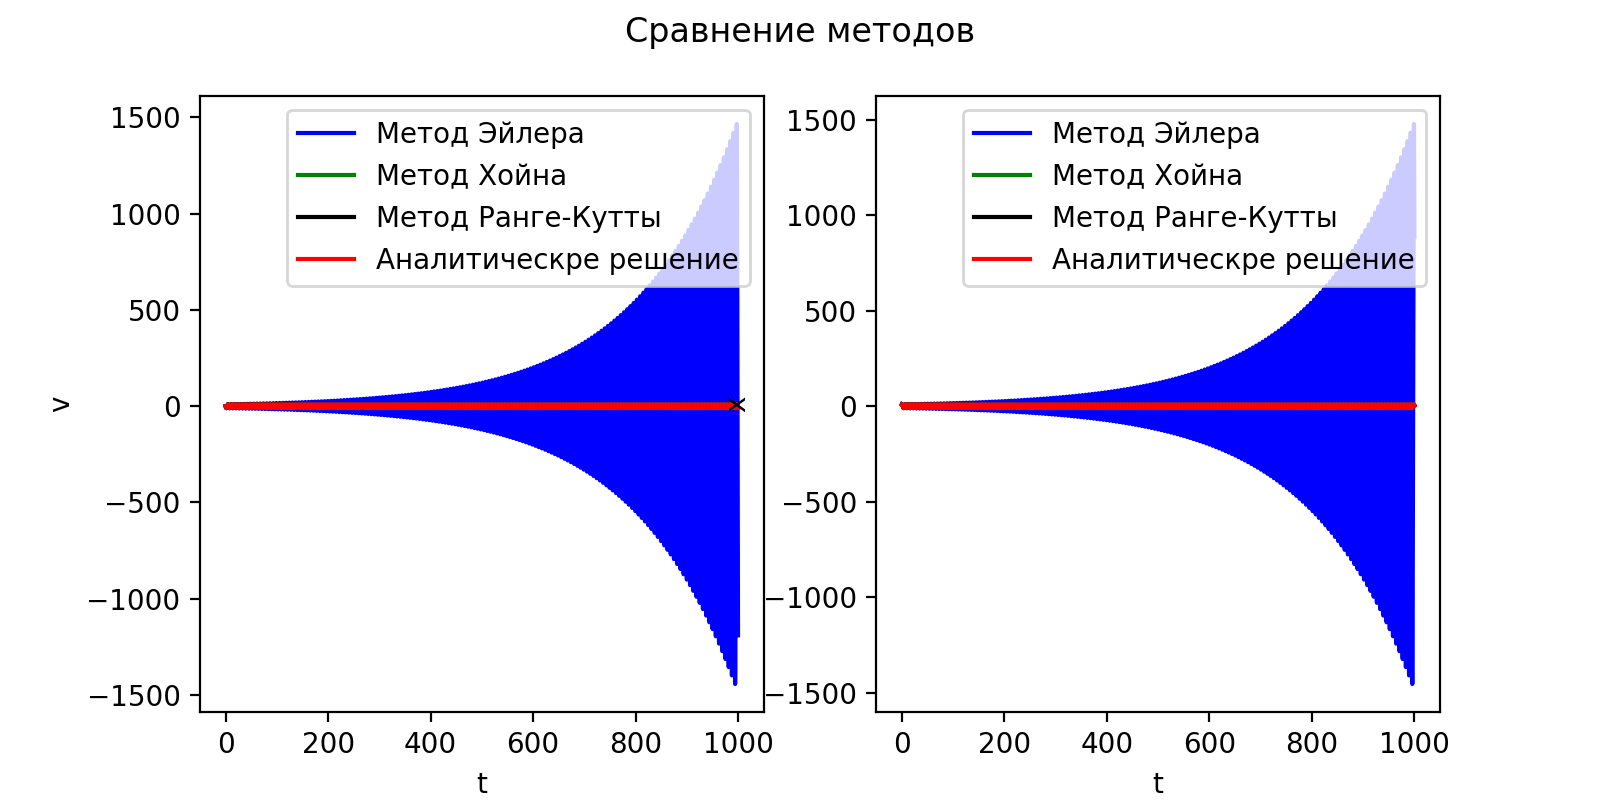

In [14]:
%matplotlib notebook

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(8,4)

fig.suptitle("Сравнение методов")

ax[0].plot(t, v, color="b", label="Метод Эйлера")
ax[1].plot(t, x, color="b", label="Метод Эйлера")
ax[0].plot(t_h, v_h, color="g", label="Метод Хойна")
ax[1].plot(t_h, x_h, color="g", label="Метод Хойна")
ax[0].plot(t_rk, v_rk, color="k", label="Метод Ранге-Кутты")
ax[1].plot(t_rk, x_rk, color="k", label="Метод Ранге-Кутты")
ax[0].plot(t_h, - omega * (x_h[0]**2 + (v_h[0]/omega)**2)**0.5 * np.sin(omega * t - np.arccos(x_h[0]/(x_h[0]**2 + (v_h[0]/omega)**2)**0.5)), color="r", label="Аналитическре решение")
ax[1].plot(t_h, (x_h[0]**2 + (v_h[0]/omega)**2)**0.5 * np.cos(omega * t - np.arccos(x_h[0]/(x_h[0]**2 + (v_h[0]/omega)**2)**0.5)), color="r", label="Аналитическре решение")

ax[0].set_xlabel('t')
ax[0].set_ylabel('v')

ax[1].set_xlabel('t')
ax[1].set_ylabel('x')

ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

plt.draw()

<IPython.core.display.Javascript object>


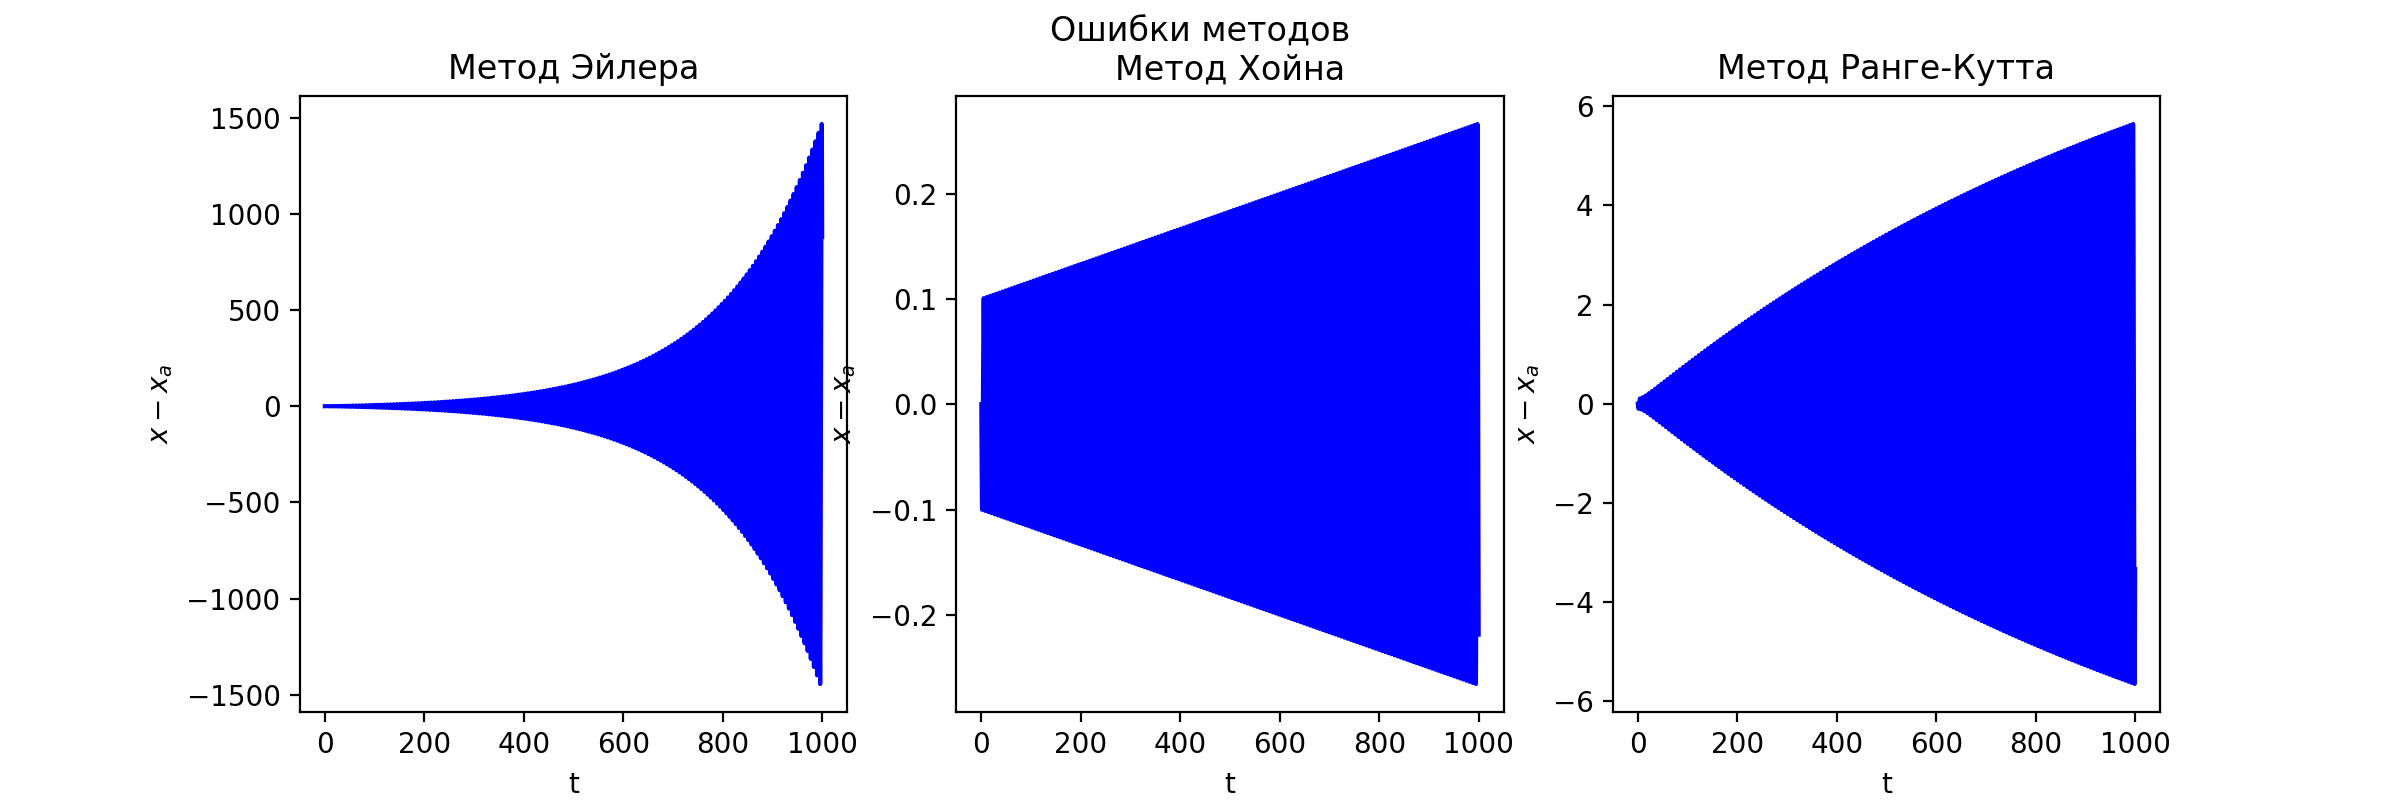

Text(0, 0.5, '$x - x_a$')

In [12]:
%matplotlib notebook

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12,4)

fig.suptitle("Ошибки методов")

delta_x = x - (x_h[0]**2 + (v_h[0]/omega)**2)**0.5 * np.cos(omega * t - np.arccos(x_h[0]/(x_h[0]**2 + (v_h[0]/omega)**2)**0.5))
ax[0].plot(t, delta_x, color="b")
delta_x_h = x_h - (x_h[0]**2 + (v_h[0]/omega)**2)**0.5 * np.cos(omega * t - np.arccos(x_h[0]/(x_h[0]**2 + (v_h[0]/omega)**2)**0.5))
ax[1].plot(t, delta_x_h, color="b")
delta_x_rk = x_rk - (x_h[0]**2 + (v_h[0]/omega)**2)**0.5 * np.cos(omega * t - np.arccos(x_h[0]/(x_h[0]**2 + (v_h[0]/omega)**2)**0.5))
ax[2].plot(t, delta_x_rk, color="b")

ax[0].set_title("Метод Эйлера")
ax[1].set_title("Метод Хойна")
ax[2].set_title("Метод Ранге-Кутта")

ax[0].set_xlabel('t')
ax[0].set_ylabel('$x - x_a$')

ax[1].set_xlabel('t')
ax[1].set_ylabel('$x - x_a$')

ax[2].set_xlabel('t')
ax[2].set_ylabel('$x - x_a$')